# Data Import & Preparation

In [1]:
import numpy as np
import pandas as pd
import datetime as datetime
from sklearn import preprocessing

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
import os
os.chdir('c:\\temp')
os.getcwd()

'c:\\temp'

In [5]:
PATH='c:\\temp\\Africa\\'

In [6]:
def trasform(df):
    df['And']=df['Territory'].apply(lambda s : ' and ' in s)
    df['Date']=df['Date'].apply(lambda s : datetime.datetime.strptime(s, '%m/%d/%y'))
    df['DateOrd']=df['Date'].apply(lambda s : s.toordinal())
    return df

In [7]:
training_set = pd.read_csv(PATH+'train.csv')
training_set = trasform(training_set)
training_set.tail()

,Territory X Date,target,cases,Territory,Date,And,DateOrd
16924,Zimbabwe X 4/7/20,2,11,Zimbabwe,2020-04-07,False,737522
16925,Zimbabwe X 4/8/20,3,11,Zimbabwe,2020-04-08,False,737523
16926,Zimbabwe X 4/9/20,3,11,Zimbabwe,2020-04-09,False,737524
16927,Zimbabwe X 4/10/20,3,13,Zimbabwe,2020-04-10,False,737525
16928,Zimbabwe X 4/11/20,3,14,Zimbabwe,2020-04-11,False,737526


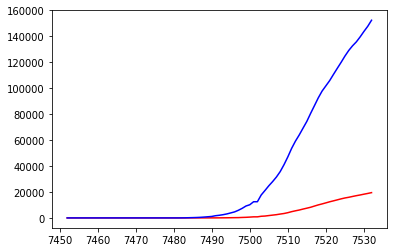

In [8]:
training_set[training_set['Territory']=='Italy']['target'].plot(color='red')
training_set[training_set['Territory']=='Italy']['cases'].plot(color='blue')

In [9]:
def extract_ter_dat(df) :
    txd = df['Territory X Date'].apply(lambda s : s.split(' X '))
    ter = []
    dat = []
    for k in range(0,len(txd)):
        ter.append(txd[k][0])
        dat.append(txd[k][len(txd[k])-1])
    df['Territory'] = ter
    df['Date'] = dat
    return df

In [10]:
validation_set = pd.read_csv(PATH+'reference.csv')
validation_set = extract_ter_dat(validation_set)
validation_set = trasform(validation_set)
validation_set.head()

,Territory X Date,target,Territory,Date,And,DateOrd
0,Afghanistan X 4/12/20,18,Afghanistan,2020-04-12,False,737527
1,Afghanistan X 4/13/20,21,Afghanistan,2020-04-13,False,737528
2,Afghanistan X 4/14/20,23,Afghanistan,2020-04-14,False,737529
3,Afghanistan X 4/15/20,25,Afghanistan,2020-04-15,False,737530
4,Afghanistan X 4/16/20,30,Afghanistan,2020-04-16,False,737531


In [11]:
sub_local = pd.read_csv(PATH+'SampleSubLocal.csv')
sub_local = extract_ter_dat(sub_local)
sub_local = trasform(sub_local)
sub_local.head()

,Territory X Date,target,Territory,Date,And,DateOrd
0,Afghanistan X 4/12/20,0,Afghanistan,2020-04-12,False,737527
1,Afghanistan X 4/13/20,0,Afghanistan,2020-04-13,False,737528
2,Afghanistan X 4/14/20,0,Afghanistan,2020-04-14,False,737529
3,Afghanistan X 4/15/20,0,Afghanistan,2020-04-15,False,737530
4,Afghanistan X 4/16/20,0,Afghanistan,2020-04-16,False,737531


In [12]:
sub_final = pd.read_csv(PATH+'SampleSubmission.csv')
sub_final = extract_ter_dat(sub_final)
sub_final = trasform(sub_final)
sub_final.head()

,Territory X Date,target,Territory,Date,And,DateOrd
0,Afghanistan X 03/06/20,0,Afghanistan,2020-03-06,False,737490
1,Afghanistan X 03/07/20,0,Afghanistan,2020-03-07,False,737491
2,Afghanistan X 03/08/20,0,Afghanistan,2020-03-08,False,737492
3,Afghanistan X 03/09/20,0,Afghanistan,2020-03-09,False,737493
4,Afghanistan X 03/10/20,0,Afghanistan,2020-03-10,False,737494


In [13]:
print('Date Intervals')
print('----------------------------------------------------------------')
print('Training set   = [',min(training_set['Date']),'-',max(training_set['Date']),']')
print('Validation set = [',min(validation_set['Date']),'-',max(validation_set['Date']),']')
print('Subm Local     = [',min(sub_local['Date']),'-',max(sub_local['Date']),']')
print('Subm Final     = [',min(sub_final['Date']),'-',max(sub_final['Date']),']')

Date Intervals
----------------------------------------------------------------
Training set   = [ 2020-01-22 00:00:00 - 2020-04-11 00:00:00 ]
Validation set = [ 2020-04-12 00:00:00 - 2020-04-18 00:00:00 ]
Subm Local     = [ 2020-04-12 00:00:00 - 2020-04-18 00:00:00 ]
Subm Final     = [ 2020-03-06 00:00:00 - 2020-06-07 00:00:00 ]


In [14]:
Noverlap = (max(training_set['Date'])-min(sub_final['Date'])).days
Noverlap

36

In [15]:
print('Complex Countries')
print('-----------------------------')
print('Training set   = [',sum(training_set['And']),']')
print('Validation set = [',sum(validation_set['And']),']')
print('Subm Local     = [',sum(sub_local['And']),']')
print('Subm Final     = [',sum(sub_final['And']),']')

Complex Countries
-----------------------------
Training set   = [ 567 ]
Validation set = [ 49 ]
Subm Local     = [ 49 ]
Subm Final     = [ 658 ]


In [16]:
my_country = 'Italy'
training_set[training_set['Territory']==my_country].tail()

,Territory X Date,target,cases,Territory,Date,And,DateOrd
7528,Italy X 4/7/20,17127,135586,Italy,2020-04-07,False,737522
7529,Italy X 4/8/20,17669,139422,Italy,2020-04-08,False,737523
7530,Italy X 4/9/20,18279,143626,Italy,2020-04-09,False,737524
7531,Italy X 4/10/20,18849,147577,Italy,2020-04-10,False,737525
7532,Italy X 4/11/20,19468,152271,Italy,2020-04-11,False,737526


In [17]:
N_train=len(training_set[training_set['Territory']==my_country])
N_train

81

In [18]:
N_valid=len(sub_local[sub_local['Territory']==my_country])
N_valid

7

# Cycle Approach with Trends

Functions for trend

In [19]:
def cut_neg(y):
    m = 0
    for i in range(0,len(y)):
        if y[i]<m : y[i]=m
    return y

In [20]:
def polynomial_trend(deg,X_train,y_true,X_test):
    pf = PolynomialFeatures(degree=deg)
    pr = pf.fit_transform(X_train)
    lrm = LinearRegression()
    lrm.fit(pr, y_true)
    y_valid = lrm.predict(pf.fit_transform(X_train))
    y_pred  = lrm.predict(pf.fit_transform(X_test))
    y_valid = cut_neg(y_valid)
    y_pred  = cut_neg(y_pred)
    return y_valid,y_pred

In [21]:
delta_max = 0.1
pct_lim   = 0.1
n_rid = int(N_train) #N_train/4 #N_train/5
def calc_trends(X_train,y_true,X_test,deg):
    N = len(y_true)
    M = len(X_test)
    Nlim = int(N*pct_lim)
    y=np.array(y_true).flatten()
    y_last  = y[len(y)-1]
    y_check = y[len(y)-1-Nlim]
    if (y_check==0) :
        den = 1 
    else :
        den = y_check
    diff = np.abs(y_last-y_check)/den
    lim  = np.mean(y_true[len(y_true)-Nlim:len(y_true)])
    if (diff<delta_max):
        y_valid = np.full([N],lim)
        y_pred  = np.full([M],lim)
        msg1    = 'cost'
        msg2    = 'cost'
    if (diff>delta_max):
        X_train_rid = X_train[N-n_rid:N]
        y_true_rid  = y_true[N-n_rid:N]
        dummy,y_pred = polynomial_trend(deg,X_train_rid,y_true_rid,X_test)
        y_valid,dummy = polynomial_trend(deg,X_train,y_true,X_test)
        msg1    = 'poly'
        msg2    = 'poly' 
    return y_valid, y_pred, msg1, msg2

Main Cycle

In [22]:
df_train=training_set.copy()
df_train.head()

,Territory X Date,target,cases,Territory,Date,And,DateOrd
0,Afghanistan X 1/22/20,0,0,Afghanistan,2020-01-22,False,737446
1,Afghanistan X 1/23/20,0,0,Afghanistan,2020-01-23,False,737447
2,Afghanistan X 1/24/20,0,0,Afghanistan,2020-01-24,False,737448
3,Afghanistan X 1/25/20,0,0,Afghanistan,2020-01-25,False,737449
4,Afghanistan X 1/26/20,0,0,Afghanistan,2020-01-26,False,737450


In [23]:
y1_train = df_train['target'].astype(int)

In [24]:
df_test  = sub_final.copy()
df_valid = sub_local.copy()

In [25]:
def mkgrow(f):
    f[0] = min(f)
    for x in range(1,len(f)):
        if (f[x]<f[x-1]):
            f[x]=f[x-1]
    return f

In [26]:
NPT = 4
md1 = XGBRegressor(n_estimators=5000, random_state=1234) #1000 o 5000
countries = df_train['Territory'].unique()
#countries = ['China','Brunei Darussalam','Italy','United States of America (the)']
for country in countries:
    print(f'Started : {country}')
    df_train_cy = df_train[df_train['Territory']==country].copy()
    df_test_cy  = df_test[df_test['Territory']==country].copy()
    X_train_pr  = df_train_cy[['DateOrd']]
    y1_train_pr = df_train_cy['target']
    X_test_pr   = df_test_cy[['DateOrd']]
    # trend
    y1_check_pr_trend, y1_pred_pr_trend, msg1, msg2 = calc_trends(X_train_pr,y1_train_pr,X_test_pr,NPT)
    df_train.loc[((df_train['Territory']==country)),'targetTrend'] = y1_check_pr_trend
    df_test.loc[((df_test['Territory']==country)),'targetTrend'] = y1_pred_pr_trend
    # residuals
    y1_train_pr_resid = y1_train_pr - y1_check_pr_trend
    md1.fit(X_train_pr,y1_train_pr_resid)
    y1_check_pr_resid = md1.predict(X_train_pr)
    y1_pred_pr_resid  = md1.predict(X_test_pr)
    df_train.loc[((df_train['Territory']==country)),'targetResid'] = y1_check_pr_resid
    df_test.loc[((df_test['Territory']==country) ),'targetResid'] = y1_pred_pr_resid
    # sum
    y_check = y1_check_pr_trend + y1_check_pr_resid
    y_pred  = y1_pred_pr_trend + y1_pred_pr_resid
    y_check = mkgrow(cut_neg(y_check))
    y_pred  = mkgrow(cut_neg(y_pred))
    df_train.loc[((df_train['Territory']==country) ),'targetValid'] = y_check  
    df_test.loc[((df_test['Territory']==country) ),'target'] = y_pred
    print(f'Finished using trends = [{msg1},{msg2}]')

Started : Afghanistan
Finished using trends = [poly,poly]
Started : Albania
Finished using trends = [poly,poly]
Started : Algeria
Finished using trends = [poly,poly]
Started : Andorra
Finished using trends = [poly,poly]
Started : Angola
Finished using trends = [cost,cost]
Started : Antigua and Barbuda
Finished using trends = [poly,poly]
Started : Argentina
Finished using trends = [poly,poly]
Started : Armenia
Finished using trends = [poly,poly]
Started : Aruba
Finished using trends = [cost,cost]
Started : Australia
Finished using trends = [poly,poly]
Started : Austria
Finished using trends = [poly,poly]
Started : Azerbaijan
Finished using trends = [poly,poly]
Started : Bahamas (the)
Finished using trends = [poly,poly]
Started : Bahrain
Finished using trends = [poly,poly]
Started : Bangladesh
Finished using trends = [poly,poly]
Started : Barbados
Finished using trends = [poly,poly]
Started : Belarus
Finished using trends = [poly,poly]
Started : Belgium
Finished using trends = [poly,poly

Finished using trends = [poly,poly]
Started : Peru
Finished using trends = [poly,poly]
Started : Philippines (the)
Finished using trends = [poly,poly]
Started : Poland
Finished using trends = [poly,poly]
Started : Portugal
Finished using trends = [poly,poly]
Started : Qatar
Finished using trends = [poly,poly]
Started : Republic of Korea (the)
Finished using trends = [cost,cost]
Started : Republic of Moldova (the)
Finished using trends = [poly,poly]
Started : Reunion
Finished using trends = [cost,cost]
Started : Romania
Finished using trends = [poly,poly]
Started : Russian Federation (the)
Finished using trends = [poly,poly]
Started : Rwanda
Finished using trends = [cost,cost]
Started : Saint Barthelemy
Finished using trends = [cost,cost]
Started : Saint Kitts and Nevis
Finished using trends = [cost,cost]
Started : Saint Lucia
Finished using trends = [cost,cost]
Started : Saint Vincent and the Grenadines
Finished using trends = [cost,cost]
Started : Samoa
Finished using trends = [cost,c

# Take a look at what you predict

In [27]:
df_train.head()

,Territory X Date,target,cases,Territory,Date,And,DateOrd,targetTrend,targetResid,targetValid
0,Afghanistan X 1/22/20,0,0,Afghanistan,2020-01-22,False,737446,2.448772,-2.447582,0.000000
1,Afghanistan X 1/23/20,0,0,Afghanistan,2020-01-23,False,737447,2.174751,-2.174683,0.000068
2,Afghanistan X 1/24/20,0,0,Afghanistan,2020-01-24,False,737448,1.910521,-1.910585,0.000068
3,Afghanistan X 1/25/20,0,0,Afghanistan,2020-01-25,False,737449,1.656083,-1.656216,0.000068
4,Afghanistan X 1/26/20,0,0,Afghanistan,2020-01-26,False,737450,1.411436,-1.411473,0.000068


In [28]:
df_test.tail()

,Territory X Date,target,Territory,Date,And,DateOrd,targetTrend,targetResid
19641,Zimbabwe X 06/03/20,10.181847,Zimbabwe,2020-06-03,False,737579,9.303431,0.878416
19642,Zimbabwe X 06/04/20,10.363619,Zimbabwe,2020-06-04,False,737580,9.485203,0.878416
19643,Zimbabwe X 06/05/20,10.547106,Zimbabwe,2020-06-05,False,737581,9.668689,0.878416
19644,Zimbabwe X 06/06/20,10.732306,Zimbabwe,2020-06-06,False,737582,9.853890,0.878416
19645,Zimbabwe X 06/07/20,10.919221,Zimbabwe,2020-06-07,False,737583,10.040805,0.878416


In [29]:
def plotExample(my_country,my_variable):
    train_cond = ((df_train['Territory']==my_country))
    test_cond  = ((df_test['Territory']==my_country))
    x_train_plt = df_train[train_cond]['DateOrd']
    y_train_plt = df_train[train_cond][my_variable]
    y_valid_plt = df_train[train_cond][my_variable+'Valid']
    y_trend_plt = df_train[train_cond][my_variable+'Trend']
    y_resid_plt = df_train[train_cond][my_variable+'Resid']
    x_test_plt  = df_test[test_cond]['DateOrd']
    y_test_plt  = df_test[test_cond][my_variable]

    plt.rcParams["figure.figsize"] = (12,6)
    fig, ax = plt.subplots()
    ax.plot(x_train_plt,y_train_plt,'o',color='orange', label='y_true')
    ax.plot(x_train_plt,y_valid_plt,'x',color='gray' , label ='y_valid')
    ax.plot(x_train_plt,y_trend_plt,'.',color='lightblue', label='y_trend')
    ax.plot(x_train_plt,y_resid_plt,'-',color='green', label='y_resid')
    ax.plot(x_test_plt,y_test_plt,'*',color='red', label='y_test')
    ax.set_xticks([])
    ax.legend()

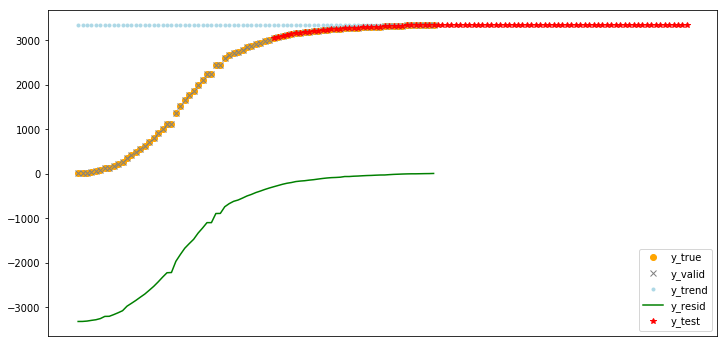

In [30]:
plotExample('China','target')

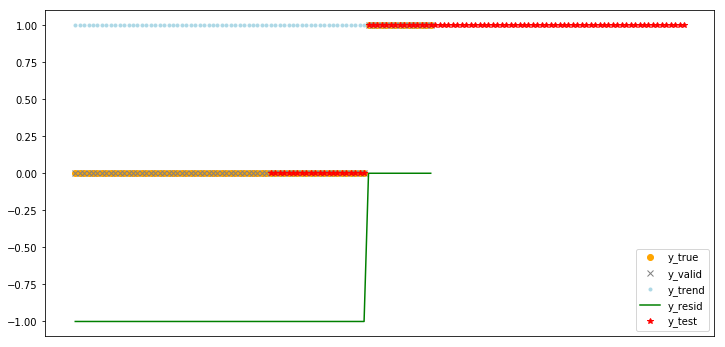

In [31]:
plotExample('Brunei Darussalam','target')

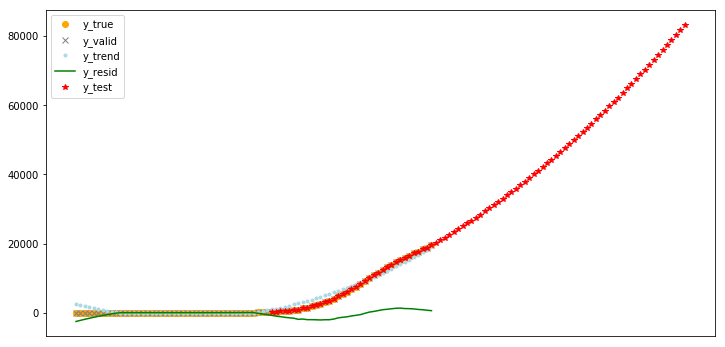

In [32]:
plotExample('Italy','target')

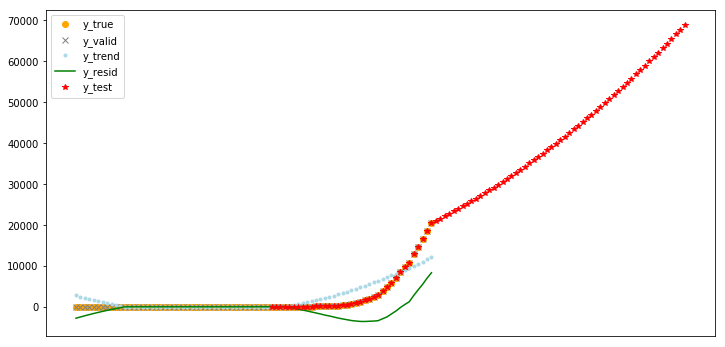

In [33]:
plotExample('United States of America (the)','target')

In [34]:
y1_valid = cut_neg(df_train['target'].copy())
y1_pred  = cut_neg(df_test['target'].copy())

In [35]:
y1_valid.describe()

count    16929.000000
mean        75.481363
std        783.570504
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20462.000000
Name: target, dtype: float64

In [36]:
y1_pred.describe()

count    19646.000000
mean       759.587596
std       4920.822760
min          0.000000
25%          0.000000
50%          2.223509
75%         37.143125
max      83167.841248
Name: target, dtype: float64

# Submission

In [37]:
submission=sub_final.copy()
submission['target']=y1_pred.astype(int)
submission.head()

,Territory X Date,target,Territory,Date,And,DateOrd
0,Afghanistan X 03/06/20,0,Afghanistan,2020-03-06,False,737490
1,Afghanistan X 03/07/20,0,Afghanistan,2020-03-07,False,737491
2,Afghanistan X 03/08/20,0,Afghanistan,2020-03-08,False,737492
3,Afghanistan X 03/09/20,0,Afghanistan,2020-03-09,False,737493
4,Afghanistan X 03/10/20,0,Afghanistan,2020-03-10,False,737494


In [38]:
def fmt_date(d):
    s = str(d.month) + "/" + str(d.day) + "/" + str(d.year-2000)
    return s

In [39]:
submission['DateStr'] = submission['Date'].apply(fmt_date)
submission.head()

,Territory X Date,target,Territory,Date,And,DateOrd,DateStr
0,Afghanistan X 03/06/20,0,Afghanistan,2020-03-06,False,737490,3/6/20
1,Afghanistan X 03/07/20,0,Afghanistan,2020-03-07,False,737491,3/7/20
2,Afghanistan X 03/08/20,0,Afghanistan,2020-03-08,False,737492,3/8/20
3,Afghanistan X 03/09/20,0,Afghanistan,2020-03-09,False,737493,3/9/20
4,Afghanistan X 03/10/20,0,Afghanistan,2020-03-10,False,737494,3/10/20


In [40]:
submission['Territory X Date New'] = submission['Territory']+' X '+submission['DateStr']

In [41]:
submission=submission[['Territory X Date New','target']]
submission.columns=['Territory X Date','target']
submission.head()

,Territory X Date,target
0,Afghanistan X 3/6/20,0
1,Afghanistan X 3/7/20,0
2,Afghanistan X 3/8/20,0
3,Afghanistan X 3/9/20,0
4,Afghanistan X 3/10/20,0


In [42]:
submission.to_csv(PATH+'submission.csv',index = False)